In [53]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
import seaborn as sns

In [52]:
#function to create and print the confusion matrix and the precision recall and F1 scores
from sklearn.metrics import confusion_matrix
def plot_cm(classifier, predictions):
    cm = confusion_matrix(y_test, predictions)
    
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap='RdBu')
    classNames = ['Extinct','Survived']
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), 
                     horizontalalignment='center', color='Yellow')
    
    plt.show()
        
    tn, fp, fn, tp = cm.ravel()

    accuracy = (tp+tn) / (tp + tn + fp + fn)
    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    F1 = 2*recall*precision/(recall+precision)

    print('Accuracy={0:0.3f}'.format(accuracy))
    print('Recall={0:0.3f}'.format(recall),'\nPrecision={0:0.3f}'.format(precision))
    print('F1={0:0.3f}'.format(F1))

#function to create the precision- recall curve
from sklearn.metrics import average_precision_score, precision_recall_curve
def plot_aucprc(classifier, scores):
    precision, recall, _ = precision_recall_curve(y_test, scores, pos_label=0)
    average_precision = average_precision_score(y_test, scores)

    print('Average precision-recall score: {0:0.3f}'.format(
          average_precision))

    plt.plot(recall, precision, label='area = %0.3f' % average_precision, color="green")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.legend(loc="best")
    plt.show()

#function to create the ROC cureve
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
def plot_aucroc(classifier):
    probs = classifier.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [54]:
df = pd.read_csv("modified_dataset.csv")
df.drop(df.columns[[0]], axis = 1, inplace = True)
df

,species_richness,ornamentation,environmental_breadth,geographic_range,occurrence,body_size,survival_status,lithology_carbonate,lithology_mixed,lithology_others,...,motility_mobile,motility_stationary,feeding_mode_carnivore,feeding_mode_chemosymbiotic,feeding_mode_deposit feeder,feeding_mode_herbivore,feeding_mode_photosymbiotic,feeding_mode_suspension feeder,shell_mineralogy_aragonite,shell_mineralogy_low Mg calcite
0,0.0,0.5,0.166667,0.000000,0.002062,0.466741,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0
1,0.0,0.5,0.500000,0.214286,0.018557,0.874605,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
2,0.0,0.5,0.000000,0.000000,0.000000,0.570972,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0.3,0.5,0.666667,0.214286,0.065979,0.041790,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,0.2,0.5,0.166667,0.357143,0.125773,0.751406,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,0.0,0.5,0.000000,0.000000,0.008247,0.474430,1,0,0,0,...,0,1,0,0,0,0,0,1,1,0
304,0.0,0.5,0.000000,0.000000,0.000000,0.448849,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
305,0.2,0.5,0.333333,0.071429,0.010309,0.726437,1,0,0,0,...,1,0,0,0,0,0,0,1,1,0
306,0.4,0.0,0.500000,0.071429,0.028866,0.547645,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [55]:
X = df.drop("survival_status", axis=1)
y = df.survival_status

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=27)

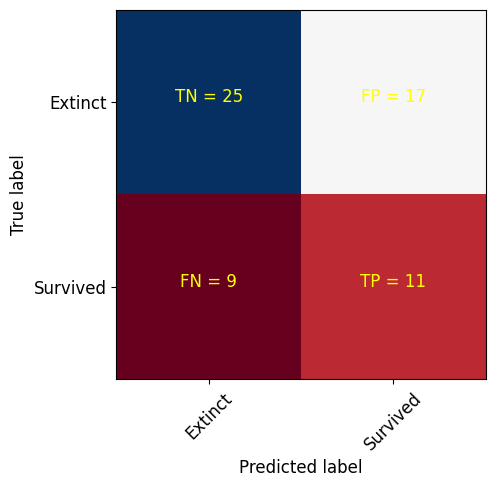

Accuracy=0.581
Recall=0.550 
Precision=0.393
F1=0.458
Average precision-recall score: 0.361


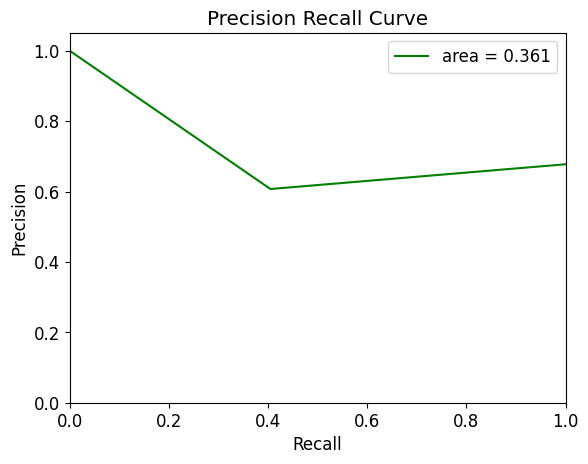

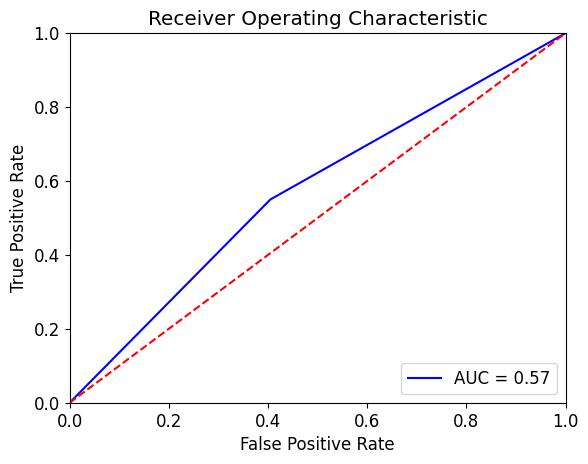

In [57]:
# Fitting Random Forest Classification to the Training set
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

#Make predictions
y_pred = clf.predict(X_test)
try:
    scores = clf.decision_function(X_test)
except:
    scores = clf.predict_proba(X_test)[:,1]

#Make plots
plot_cm(clf, y_pred)
plot_aucprc(clf, scores)
plot_aucroc(clf)

In [58]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 27)

Classification of SMOTE-resampled dataset with Decision Trees


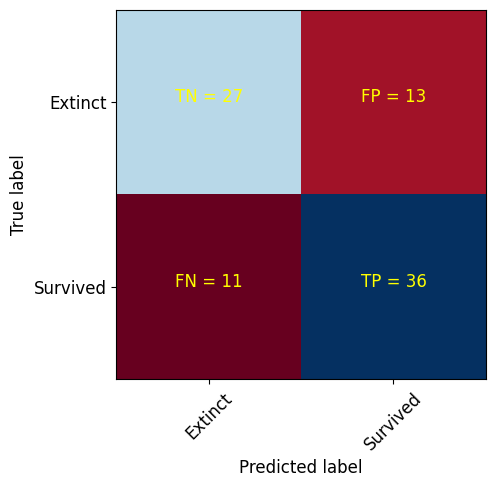

Accuracy=0.724
Recall=0.766 
Precision=0.735
F1=0.750
Average precision-recall score: 0.689


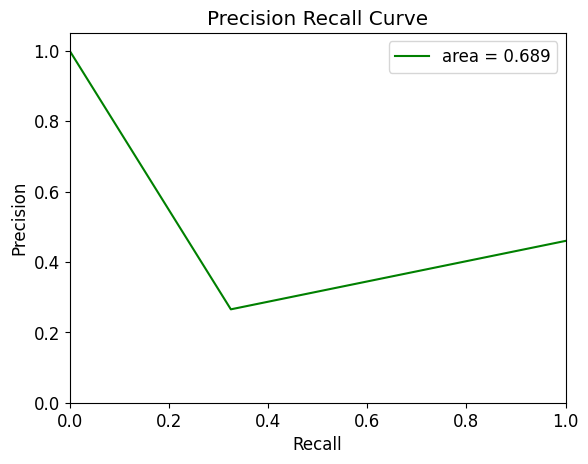

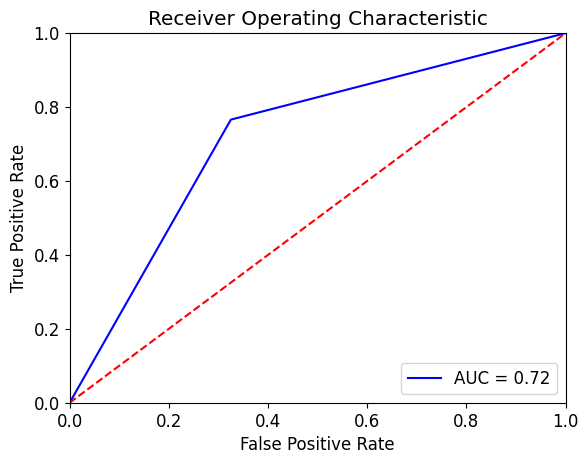

In [59]:
print('Classification of SMOTE-resampled dataset with Decision Trees')

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

#Make predictions
y_pred = clf.predict(X_test)
try:
    scores = clf.decision_function(X_test)
except:
    scores = clf.predict_proba(X_test)[:,1]

#Make plots
plot_cm(clf, y_pred)
plot_aucprc(clf, scores)
plot_aucroc(clf)

### SHAP

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
Using 347 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/87 [00:00<?, ?it/s]

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
X does not have valid feature names, but DecisionTreeClassifier was fitted with feature nam

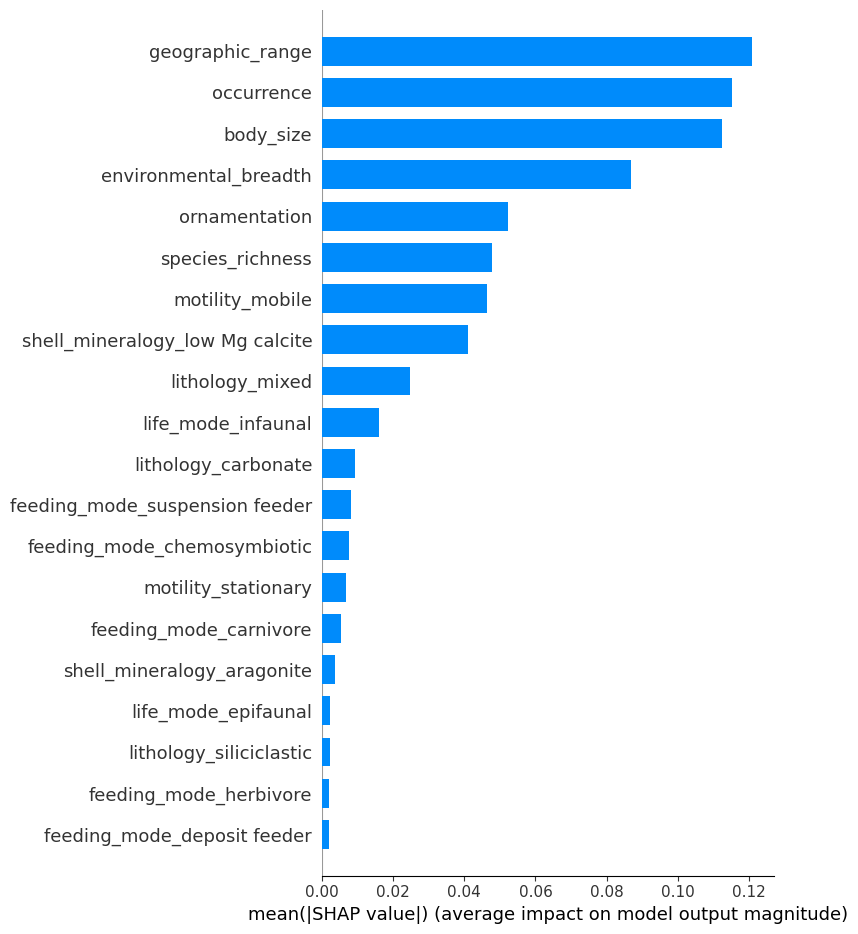

In [46]:
import shap

explainer = shap.KernelExplainer(clf.predict, X_train)
shap_values = explainer.shap_values(X_test)

features = df.drop(['survival_status'], axis=1).columns.tolist() #not needed for this plot
shap_df = pd.DataFrame(shap_values, columns=pd.Index(features, name='features')) #not needed for this plot

shap.summary_plot(shap_values, X_train, plot_type="bar")

In [47]:
group_categorical = {
    'lithology' : 	['lithology_carbonate',
                    'lithology_mixed',
                    'lithology_others',
                    'lithology_siliciclastic'],
    
    'life_mode'	:['life_mode_epifaunal',
                'life_mode_infaunal',
                'life_mode_semi-infaunal'],
    
    'motility' : ['motility_mobile',
                'motility_stationary'],
    
    'feeding_mode' : ['feeding_mode_carnivore',
                    'feeding_mode_chemosymbiotic',
                    'feeding_mode_deposit feeder',
                    'feeding_mode_photosymbiotic',
                    'feeding_mode_suspension feeder'],	
    
    'shell_mineralogy' : ['shell_mineralogy_aragonite',
                        'shell_mineralogy_low Mg calcite'],

    'species_richness' : ['species_richness'],
    
    'ornamentation'	: ['ornamentation'],
    
    'environmental_breadth' : ['environmental_breadth'],	
    
    'geographic_range' : ['geographic_range'],	
    
    'occurrence' : ['occurrence'],

    'body_size' : ['body_size']
}

In [48]:
from itertools import repeat, chain
revert_dict = lambda d: dict(chain(*[zip(val, repeat(key)) for key, val in d.items()]))

map = revert_dict(group_categorical)

In [49]:
def grouped_shap(shap_vals, features, groups):
    groupmap = revert_dict(groups)
    shap_Tdf = pd.DataFrame(shap_vals, columns=pd.Index(features, name='features')).T
    shap_Tdf['group'] = shap_Tdf.reset_index().features.map(groupmap).values
    shap_grouped = shap_Tdf.groupby('group').sum().T
    return shap_grouped

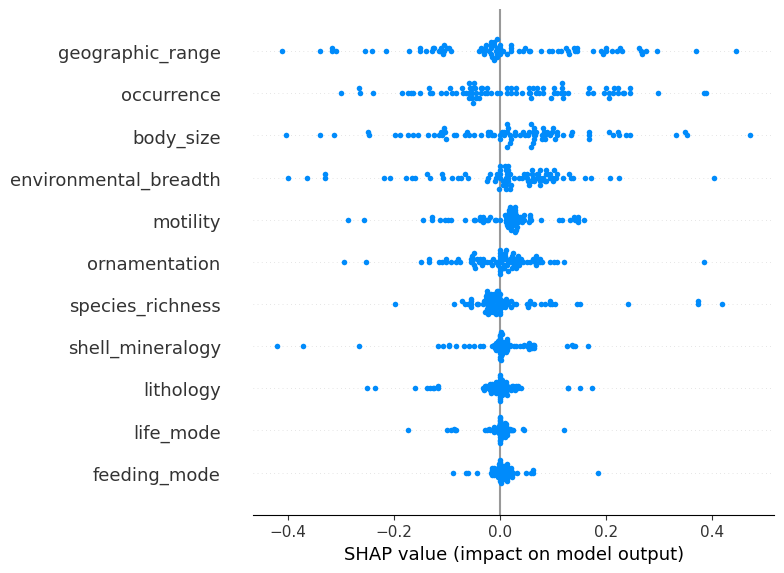

In [50]:
shap_type = grouped_shap(shap_values, features, group_categorical)
shap.summary_plot(shap_type.values, features=shap_type.columns)

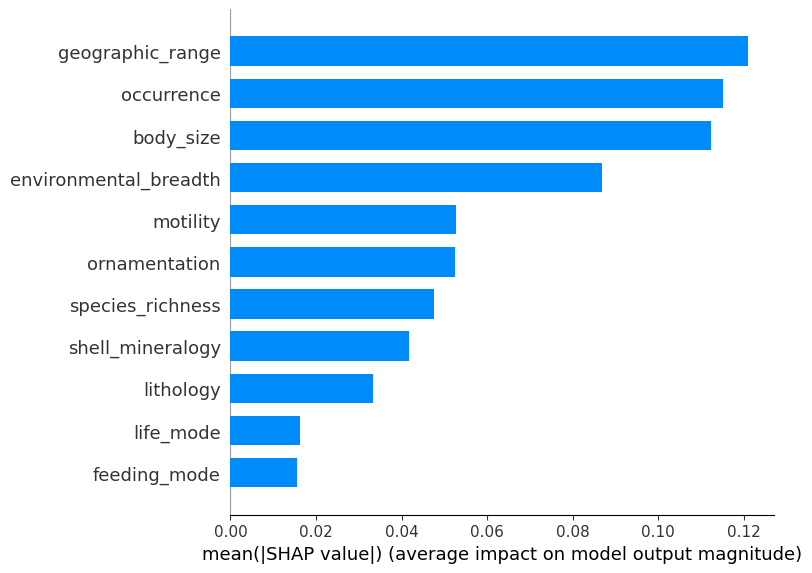

In [51]:
shap.summary_plot(shap_type.values, features=shap_type.columns, plot_type="bar")